Model Analysis - LIF model

$$\tau\frac{dV}{dt} = - V - (V_{rest} + stim(t) * R)$$

In which $V$ is membrane potential, $V_rest$ is resting potential, $R$ is resistance of 

The solution of this sifferential equation with constant input $I_0$ is easy to compute: 

$$V(t) = V_{rest} + RI_0 * (1 - e^{-\frac{t}{\tau_m}})$$

Thus we can easily get the threshold value of constant input that can generate an spike. In our realization, $V_rest$ = -70, $V$ = -55, thus the threshold value of $I_0$ is 15.

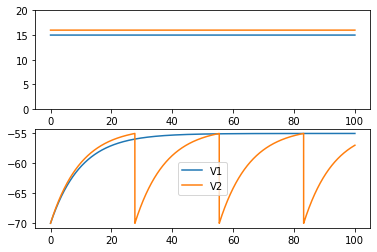

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from input import const_input, ramp_input, sinuous_input, biphasic_input

'''
LIF neuron model: (dV/dt) = - (V - (V_rest + stim * R)) / tau
'''

V_rest = -70.   # resting potential in mV
V_reset = -70.  # reset potential in mV
V_th = -55.     # spike threshold potential in mV
R = 1.          # membrane resistance in ?
tau = 10.       # time const in ms

simu_time = 100 # simulation time in ms
ts = 0.01       # time step in ms

def LIF(V_rest = -70., V_reset = -70., V_th = -55., R = 1., 
        tau = 10., stim = None, simu_time = 100., ts = 0.01):
    # set init values
    t = 0.          # time
    V = -70         # membrane potential
    epoch = int(simu_time // ts + 1)   # num of stim epoch
    for i in range(epoch):
        dvdt = - ((V - (V_rest + stim[i] * R)) / tau)
        V = V + ts * dvdt
        if V >= V_th:
            V = V_reset
        t_list.append(t)
        V_list.append(V)
        t += ts

# record value in list
t_list = []
V_list = []
stim1 = const_input(15., simu_time, ts)
# list of input, change with different input waveform
LIF(V_rest = V_rest, V_reset = V_reset, V_th = V_th, R = R,
    tau = tau, stim = stim1, simu_time = simu_time, ts = ts)
V_list1 = copy.deepcopy(V_list)

# record value in list
t_list = []
V_list = []
stim2 = const_input(16, simu_time, ts)
# list of input, change with different input waveform
LIF(V_rest = V_rest, V_reset = V_reset, V_th = V_th, R = R,
    tau = tau, stim = stim2, simu_time = simu_time, ts = ts)
V_list2 = copy.deepcopy(V_list)

fig, axs = plt.subplots(2, 1)
axs[0].plot(t_list, stim1, label = "input=15")
axs[0].plot(t_list, stim2, label = "input=16")
axs[0].set_ylim(0., 20.)
axs[1].plot(t_list, V_list1, label = 'V1')
axs[1].plot(t_list, V_list2, label = 'V2')
plt.legend()
plt.show()

The simulation result is accordance with the theory solution. Basically, LIF model is just an integration of input. Therefore, any type of input than can provide enough sum of stimulus in a realtively short time period can generate spike in LIF model (which means sinuous input with high omega won't work).

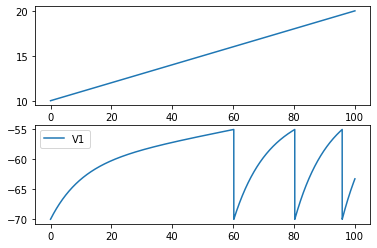

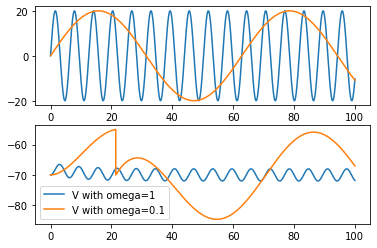

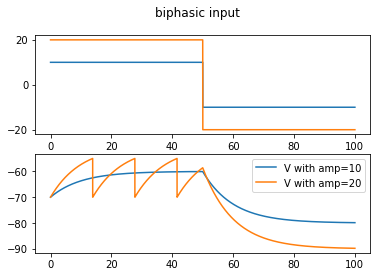

In [3]:
# compare with other type of inputs
## ramp input

fig, axs = plt.subplots(2, 1)
for startVal, endVal in [(10, 20)]:
    stim = ramp_input(startVal, endVal, simu_time, ts)
    t_list = []
    V_list = []
    LIF(V_rest = V_rest, V_reset = V_reset, V_th = V_th, R = R,
        tau = tau, stim = stim, simu_time = simu_time, ts = ts)
    axs[0].plot(t_list, stim, label = f"({startVal}, {endVal})")
    axs[1].plot(t_list, V_list, label = 'V1')
    plt.legend()
plt.show()
    

## sinuous input
fig, axs = plt.subplots(2, 1)
for amp, omega, b in [(20, 1, 0), (20, 0.1, 0)]:
    stim = sinuous_input(amp, omega, b, simu_time, ts)
    t_list = []
    V_list = []
    LIF(V_rest = V_rest, V_reset = V_reset, V_th = V_th, R = R,
        tau = tau, stim = stim, simu_time = simu_time, ts = ts)
    axs[0].plot(t_list, stim, label = f"({startVal}, {endVal})")
    axs[1].plot(t_list, V_list, label = f'V with omega={omega}')
    plt.legend()
plt.show()

## biphasic input
fig, axs = plt.subplots(2, 1)
fig.suptitle("biphasic input")
for amp in [(10), (20)]:
    stim = biphasic_input(amp, simu_time, ts)
    t_list = []
    V_list = []
    LIF(V_rest = V_rest, V_reset = V_reset, V_th = V_th, R = R,
        tau = tau, stim = stim, simu_time = simu_time, ts = ts)
    axs[0].plot(t_list, stim, label = f"({amp})")
    axs[1].plot(t_list, V_list, label = f'V with amp={amp}')
    plt.legend()
plt.show()